## M345SC 2019 Lab 4

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [2]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    s: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    
    Q = []
    Q.append(s)
    L2[s] = 1
    L3[s] = 0
    while len(Q) > 0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v] = 1
                L3[v] = 1+L3[x]
                L4[v].extend(L4[x]) #Add path to node x and node v to path
                L4[v].append(v)     #for node v
            print("v=",v)
            print("Q=",Q)
    return L2,L3

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortes path between nodes 0 and 1 is 0->2->3->1. 

In [1]:
#New function here
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    s: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    L4: Shortest path between source and node i
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths
    
    Q = []
    Q.append(s)
    L2[s] = 1
    L3[s] = 0
    L4[s] = [s]
    while len(Q) > 0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v] = 1
                L3[v] = 1+L3[x]
                L4[v].extend(L4[x]) #Add path to node x and node v to path
                L4[v].append(v)     #for node v
            print("v=",v)
            print("Q=",Q)
    return L2,L3,L4

2. Test your function with a modestly-sized Barabasi-Albert graph and verify that it computes shortest-paths correctly:

Populating the interactive namespace from numpy and matplotlib
***x= 1  ***
v= 2
Q= [2]
v= 3
Q= [2, 3]
v= 4
Q= [2, 3, 4]
v= 5
Q= [2, 3, 4, 5]
***x= 2  ***
v= 0
Q= [3, 4, 5, 0]
v= 1
Q= [3, 4, 5, 0]
v= 3
Q= [3, 4, 5, 0]
v= 7
Q= [3, 4, 5, 0, 7]
***x= 3  ***
v= 1
Q= [4, 5, 0, 7]
v= 2
Q= [4, 5, 0, 7]
v= 4
Q= [4, 5, 0, 7]
v= 5
Q= [4, 5, 0, 7]
v= 6
Q= [4, 5, 0, 7, 6]
***x= 4  ***
v= 1
Q= [5, 0, 7, 6]
v= 3
Q= [5, 0, 7, 6]
v= 7
Q= [5, 0, 7, 6]
***x= 5  ***
v= 1
Q= [0, 7, 6]
v= 3
Q= [0, 7, 6]
***x= 0  ***
v= 2
Q= [7, 6]
v= 6
Q= [7, 6]
***x= 7  ***
v= 2
Q= [6]
v= 4
Q= [6]
***x= 6  ***
v= 0
Q= []
v= 3
Q= []


[[1, 2, 0], [1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 3, 6], [1, 2, 7]]

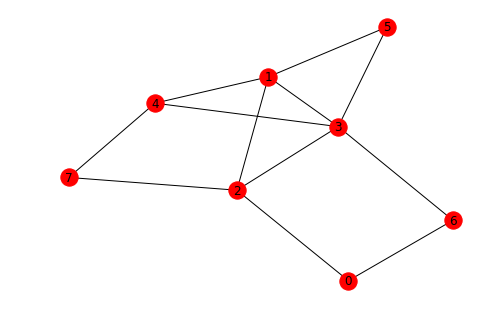

In [2]:
#Add code here
%pylab inline
BA = nx.barabasi_albert_graph(8, 2)
nx.draw(BA, with_labels=True)
L2, L3, L4 = bfs(BA, 1)
L4

### Task 2: Code performance and memory

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

In [7]:
import numpy as np
from time import time
#Add code here
n = 1000
M = np.random.rand(n, n)
t1 = time()
colmean = mean(M, axis = 0)
SD = [0 for i in range(n)]
for row in range(n):
    SD += (M[row,:] - colmean)**2
SD = sqrt(SD)
t2 = time()
dt1 = t2-t1
t1 = time()
rowmean = mean(M, axis = 1)
SD = [0 for i in range(n)]
for col in range(n): 
    SD += (M[:, col] - rowmean)**2
SD = sqrt(SD)
t2 = time()
dt2 = t2-t1
print("dt1 = ", dt1)
print("dt2 = ", dt2)

dt1 =  0.007291078567504883
dt2 =  0.014756917953491211


In [8]:
# Corrections
nlist = [8000]

for n in nlist:
    #Iterating across rows
    A = np.random.rand(n,n)
    t1 = time()
    for i in range(n):
        x = np.std(A[:,i])
        
    t2 = time()
    dt1 = t2-t1
    
    #Iterating across columns
    A = np.random.rand(n,n)
    t1 = time()
    for i in range(n):
        x = np.std(A[i,:])
    
    t2 = time()
    dt2 = t2 - t1
    print("n = ", n, "dt1 = ", dt1, "dt2 = ", dt2, "dt2/dt1 = ", dt2/dt1)

n =  8000 dt1 =  2.5404341220855713 dt2 =  0.39023590087890625 dt2/dt1 =  0.15360992732948406


Iterating across rows of the matrix proves to have a shorter walltime (faster) for large n. The difference increases as n becomes increasingly large. It is noticebly faster for n > 1000. 

2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [6]:
import numpy as np
from time import time
#add code here
t1 = time()
_ = np.std(M)
t2 = time()
t2-t1

0.008427143096923828

In [9]:
# Corrections
nlist = [8000]

for n in nlist:
    A = np.random.rand(n,n)
    t1 = time()
    x = np.std(A, axis=0) # Column mean
    t2 = time()
    dt1 = t2-t1
    
    A = np.random.rand(n,n)
    t1 = time()
    x = np.std(A, axis=1) # Row mean
    t2 = time()
    dt2 = t2-t1
    print("n = ", n, "dt1 = ", dt1, "dt2 = ", dt2, "dt2/dt1 = ", dt2/dt1)

n =  8000 dt1 =  0.6148881912231445 dt2 =  0.552056074142456 dt2/dt1 =  0.8978153785069414


The built-in method is much faster than iterating across rows, since the built-in function is coded in C/Fortran, which is faster in performance as compared to a integrated language like Python. 

*Time difference appears to go away when the built-in method is used. dt1/dt2 should be close to 1 for even large n and similar to dt2 in the previous part*